# Exploratory Data Analysis (EDA)



In [1]:
    
import numpy as np

# import spacy
# import nltk
# import re
# from nltk.corpus import stopwords
# from collections import Counter 

## Load Data

In [2]:
import pandas as pd

raw_data_path = "../data/raw/nlp_da.csv"
df_init = pd.read_csv(raw_data_path)

print(f"Dataset shape: {df_init.shape}")
df_init.head()

Dataset shape: (20000, 15)


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [3]:
# --- info
df_init.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   subject   18539 non-null  str  
 1   body      19998 non-null  str  
 2   answer    19996 non-null  str  
 3   type      20000 non-null  str  
 4   queue     20000 non-null  str  
 5   priority  20000 non-null  str  
 6   language  20000 non-null  str  
 7   tag_1     20000 non-null  str  
 8   tag_2     19954 non-null  str  
 9   tag_3     19905 non-null  str  
 10  tag_4     18461 non-null  str  
 11  tag_5     13091 non-null  str  
 12  tag_6     7351 non-null   str  
 13  tag_7     3928 non-null   str  
 14  tag_8     1907 non-null   str  
dtypes: str(15)
memory usage: 19.9 MB


## Exploration Analysis
### Fusion de 'body' & 'subject'

In [4]:
df_init["body_subject"]=df_init["body"].astype(str)+" "+df_init["subject"].astype(str)

### Ticket Types Distribution

In [5]:
import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 6))
# # df_num=["text_length", "word_count"]
# df_copy=df_init.copy()
# df_num=df_copy.select_dtypes(include=np.number)
# df_num.head()

# ---- Bar Chart / Count Plot ----
# for col in df_num:
#     sns.histoplot(df_init[col],bins=30, kde=True, color='teal')
#     plt.title('Distribution of Ticket Types')
#     plt.xlabel(f'{col}')
#     plt.ylabel('Count')
#     plt.show()
#     print("Value counts for ticket types:")
#     print(df_num[col].value_counts())

### countplot

['body', 'subject', 'subject', 'body', 'answer', 'queue', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'body_subject']


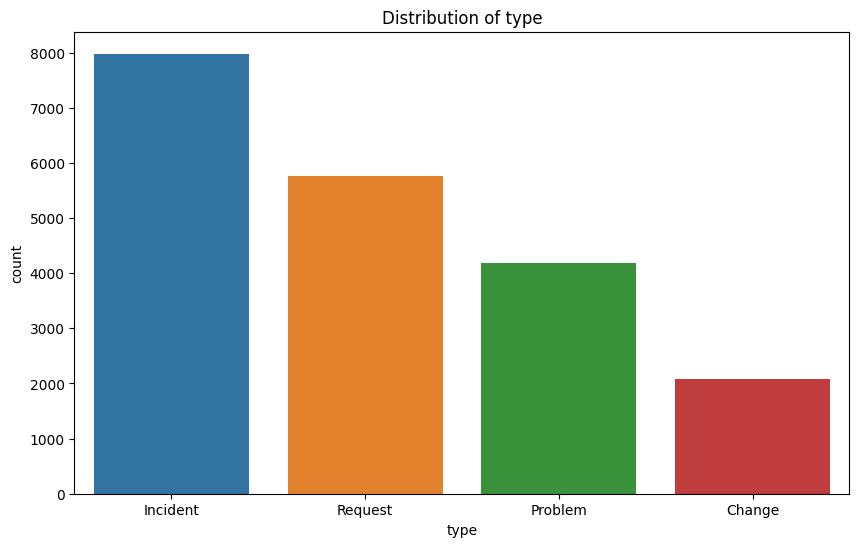

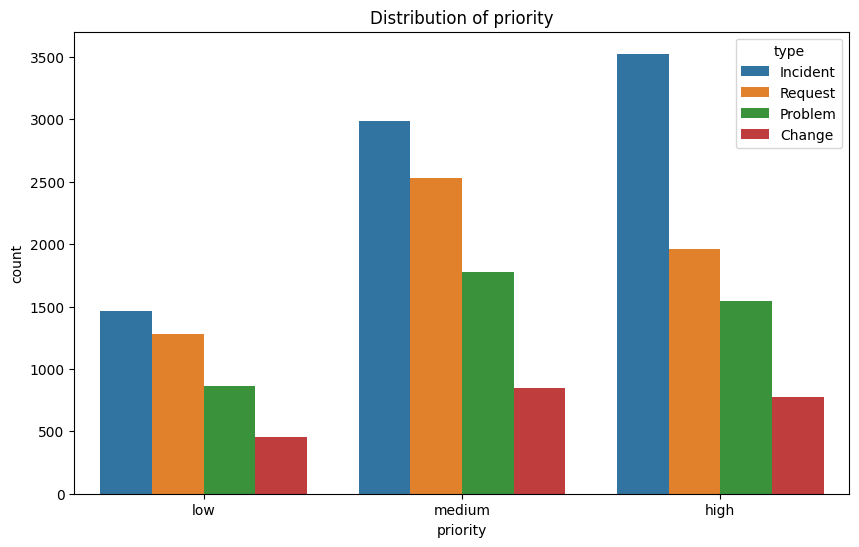

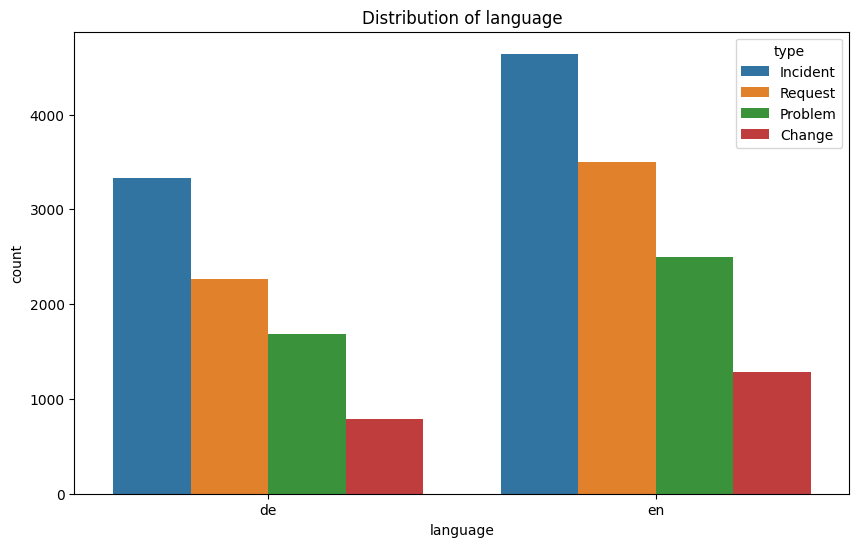

In [8]:
import seaborn as sns

df_unique=df_init.copy()
df_unique["body_subject"]=df_unique["body"].astype(str)+" "+df_unique["subject"].astype(str)
def unique_value():
    col_to_delete=["body","subject"] 
    for i in df_unique:
        if df_init[i].nunique()>5:
            col_to_delete.append(i)
    return col_to_delete

liste_col=unique_value()
print(liste_col)

df_unique.drop(labels=liste_col, axis=1, inplace=True)
# 0 : index, 1 : cols
# df_unique=pd.concat([df_unique, "body_subject"], axis=1)

for col in df_unique:
    plt.figure(figsize=(10,6))    
    # if col=='type':
        # continue
    sns.countplot(data=df_unique, x=col, hue='type')
    # size_r=df_unique[col].value_counts()
    # plt.pie(size_r, labels=size_r.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {col}")



### Pie Chart (Camembert)

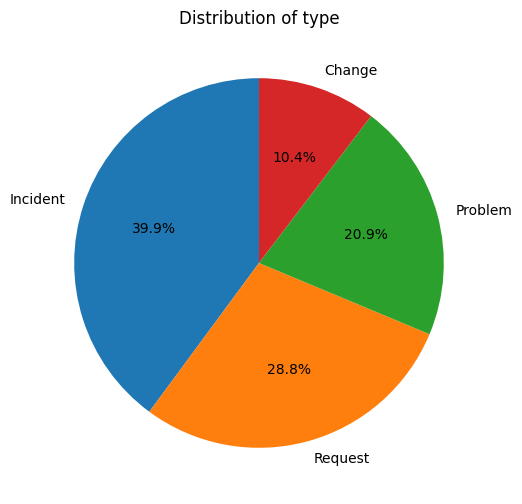

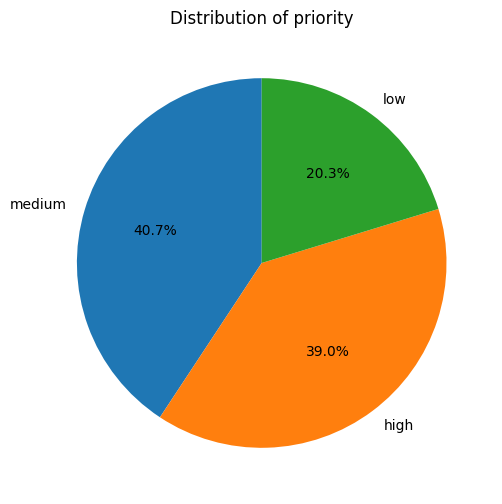

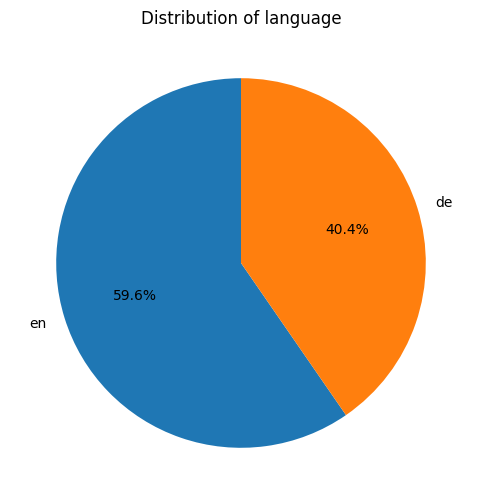

In [ ]:
for col in df_unique:
    plt.figure(figsize=(10,6))    
    # if col=='type':
        # continue
    # sns.countplot(data=df_unique, x=col, hue='type')
    size_r=df_unique[col].value_counts()
    plt.pie(size_r, labels=size_r.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {col}")

### 2.2 Merging Text Fields (Subject + Body)

Merging the subject and body provides more context for the NLP model.

In [ ]:
# df['full_text'] = df['subject'].fillna('') + " " + df['body'].fillna('')
# print("Created 'full_text' column by merging 'subject' and 'body'.")
# df[['subject', 'body', 'full_text']].head()

NameError: name 'df' is not defined

### 2.3 Email Length Analysis

Analyzing the length of the merged text (number of characters and words).

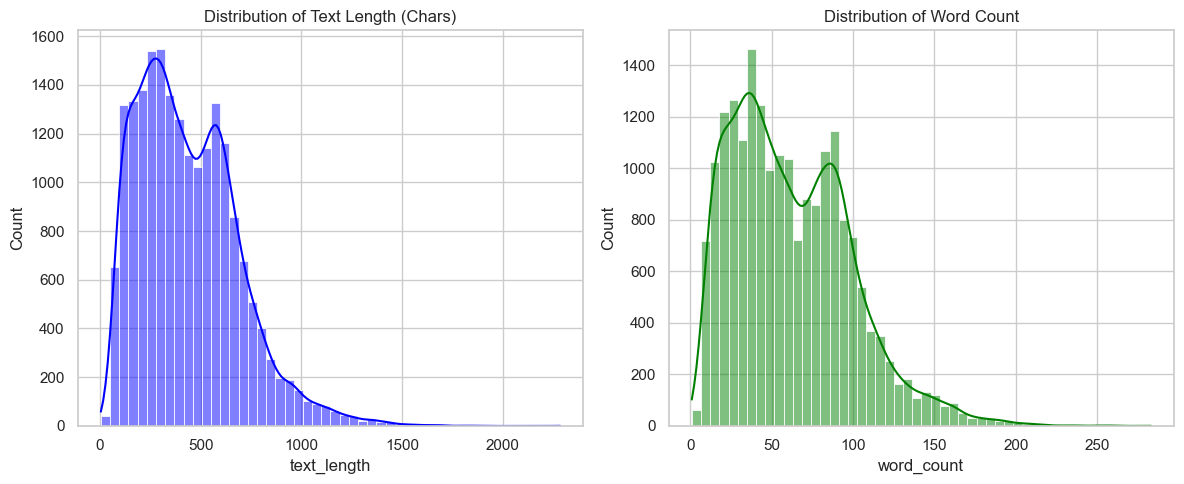

Descriptive statistics for length:
        text_length   word_count
count  20000.000000  20000.00000
mean     437.032700     62.16330
std      250.291682     36.82158
min        5.000000      1.00000
25%      241.000000     33.00000
50%      401.000000     57.00000
75%      595.000000     87.00000
max     2284.000000    283.00000


In [ ]:
df['text_length'] = df['full_text'].apply(len)
df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Text Length (Chars)')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Word Count')

plt.tight_layout()
plt.show()

print("Descriptive statistics for length:")
print(df[['text_length', 'word_count']].describe())

## 3. Text Preprocessing Prototypes

In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespaces
    text = " ".join(text.split())
    
    return text

In [ ]:
try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def advanced_clean(text):
    doc = nlp(text)
    # Lemmatize and remove stopwords/punctuation
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

Traceback (most recent call last):
  File "c:\Dev\Briefs-Simplon\NLP-Ticket-Classification-MLOps\venv\Lib\site-packages\urllib3\connection.py", line 204, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Dev\Briefs-Simplon\NLP-Ticket-Classification-MLOps\venv\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Dev\Briefs-Simplon\NLP-Ticket-Classification-MLOps\venv\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
OSError: [WinError 10051] A socket operation was attempted to an unreachable network

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Dev\Briefs-Simplon\NLP-Ticket-Classification-MLOps\venv\Lib\site-packages\urllib3\connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "c:\Dev\Briefs-Simplon\NLP

NameError: name 'spacy' is not defined

## 4. Apply Cleaning to Merged Text

In [ ]:
print("Applying simple cleaning to 'full_text'...")
df['cleaned_text'] = df['full_text'].apply(clean_text)
df[['full_text', 'cleaned_text']].head()